In [1]:
import pandas as pd
df=pd.read_csv('news_comment_BTS.csv',encoding='UTF-8')

In [2]:
df

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
1195,2020-09-01 06:45:44,역시!!!!!!!!!!!!,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1196,2020-09-01 06:45:05,우리 탄이들 너무 자랑스럽고\n사랑해<U+0001F49C><U+0001F49C><U...,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1197,2020-09-01 06:40:15,이런애들 꼭 군대를 보내 는게 맞을까요,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1198,2020-09-01 06:38:56,군면제급이다 이건,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [4]:
#불필요한 문자 제거하기

In [5]:
df['reply']=df['reply'].str.replace('[^가-힣]',' ',regex=True)   
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [6]:
#3. 명사 추출하기

In [7]:
import konlpy
kkma=konlpy.tag.Kkma()

In [11]:
kkma

In [12]:
nouns=df['reply'].apply(kkma.nouns)     #명사 추출-apply()활용
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [13]:
nouns=nouns.explode()         #한 행에 한 단어가 들어가도록 구성
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [15]:
df_word=pd.DataFrame({'word':nouns})   #데이터 프레임 만들기
df_word['count']=df_word['word'].str.len()   #글자 수 추가
df_word=df_word.query('count>=2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [16]:
#빈도표 만들기
df_word=df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

In [17]:
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [18]:
top20=df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  fu

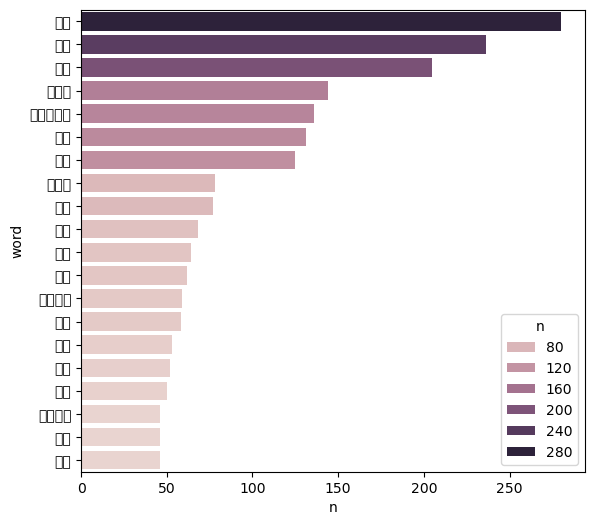

In [29]:
plt.rcParams.update({'figure.figsize':[6.5,6]})    #가로, 세로 크기 설정
sns.barplot(data=top20,x='n',y='word',hue='n')

In [21]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [28]:
font='DoHyeon-Regular.ttf'

In [30]:
plt.rcParams.update({'figure.figsize'=[6.5,6],
'font.family':'Malgun Gothic',
'figure.dpi':'123'})    #가로, 세로 크기 설정
sns.barplot(data=top20,x='n',y='word',hue='n')

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1902288568.py, line 1)

<Axes: xlabel='n', ylabel='word'>

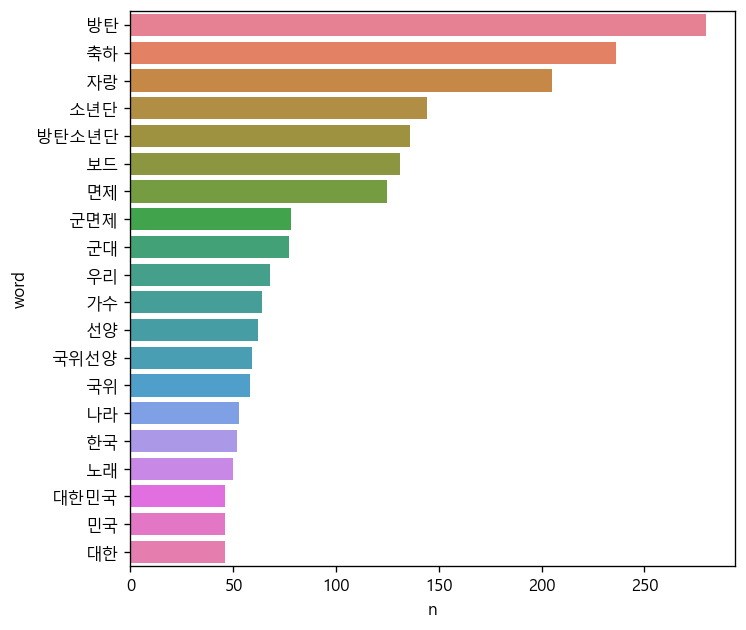

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic',
                    'figure.dpi':'120',
                    'figure.figsize':[6.5,6]})
sns.barplot(data=top20,x='n',y='word',hue='word')

In [32]:
df_word=df_word.set_index('word').to_dict()['n']

In [33]:
df_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '대한민국': 46,
 '민국': 46,
 '대한': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '정국': 29,
 '사람': 29,
 '라니': 29,
 '행복': 29,
 '사랑': 28,
 '역사': 28,
 '생일': 27,
 '코로나': 27,
 '차트': 27,
 '핫백': 26,
 '위라니': 24,
 '감사': 24,
 '축하해': 23,
 '우리나라': 23,
 '전세계': 22,
 '그룹': 22,
 '싱글': 22,
 '미국': 22,
 '이것': 22,
 '진심': 22,
 '인정': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '요즘': 19,
 '음악': 19,
 '활동': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '너희': 15,
 '국가': 15,
 '올림픽': 15,
 '이제': 15,
 '문화': 15,
 '때문': 15,
 '국민': 15,
 '뉴스': 15,
 '기분': 14,
 '숟가락': 14,
 '기사': 14,
 '멤버': 14,
 '수고': 14,
 '대통령': 14,
 '내가': 14,
 '한국인': 13,
 '아티스트': 13,
 '눈물': 13,
 '이름': 13,
 '시국': 13,
 '마이트': 12,
 '금메달': 12,
 '지금': 12,
 '아시아': 12,
 '댓글': 12,
 '친구': 11,
 '위로': 11,
 '재인': 11,
 '남자': 11,
 '싱글차트': 11,

In [34]:
from wordcloud import WordCloud
import numpy as np

In [35]:
wc=WordCloud(random_state=1234,      #난수 설정
            font_path=font,         #폰트 설정
            width=400,               #가로 크기
            height=400,              #세로 크기
            background_color='white',
            mask=img)    #배경색

NameError: name 'img' is not defined

In [40]:
import numpy as np
img=PIL.Image.new('RGB',icon.size,(255,255,255))
img.paste(icon,icon)
img=np.array(img)

In [39]:
import PIL
icon=PIL.Image.open('cloud.png')

In [42]:
img_wordcloud=wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)

NameError: name 'wc' is not defined